## Linear Regression

y = θ0+ θ1x1+ θ2x2+ ⋯ + θnxn


# The Normal Equation

To find the value of θ that minimizes the cost function, there is a closed-form solution
—in other words, a mathematical equation that gives the result directly. This is called
the Normal Equation

Let’s generate some linear-looking data to test this equation on (Figure 4-1):

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [2]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
print(len(X))

100


In [4]:
print(X)

[[0.36949123]
 [0.25372681]
 [0.8479864 ]
 [0.60455387]
 [0.4718269 ]
 [1.49164071]
 [0.24597032]
 [1.15414063]
 [1.41333477]
 [0.22362409]
 [0.22637518]
 [1.83785985]
 [1.63790989]
 [1.73988538]
 [0.13004616]
 [1.22045723]
 [0.39317092]
 [1.08644139]
 [0.75104819]
 [1.47556557]
 [1.90824395]
 [0.32086485]
 [0.67791253]
 [1.952566  ]
 [1.95529997]
 [1.9013195 ]
 [0.80373619]
 [1.85311332]
 [1.84984008]
 [1.51699774]
 [0.39119342]
 [1.64393819]
 [1.7593026 ]
 [1.49228059]
 [1.58039339]
 [1.11497008]
 [1.4390498 ]
 [0.03237984]
 [1.32702104]
 [0.86503281]
 [1.38178618]
 [1.49994709]
 [1.82669362]
 [0.58397292]
 [0.7529711 ]
 [1.39057692]
 [1.43665239]
 [1.62193656]
 [0.22544034]
 [0.39067216]
 [1.10510936]
 [1.27151552]
 [1.05316746]
 [1.72159421]
 [1.28717042]
 [1.60585313]
 [1.81308008]
 [0.3879883 ]
 [1.00984735]
 [1.80944613]
 [0.86801792]
 [0.81453568]
 [1.59791111]
 [1.33470041]
 [0.43741617]
 [0.7709521 ]
 [1.45206314]
 [1.81704137]
 [0.31324929]
 [0.3189115 ]
 [0.30752425]
 [0.48

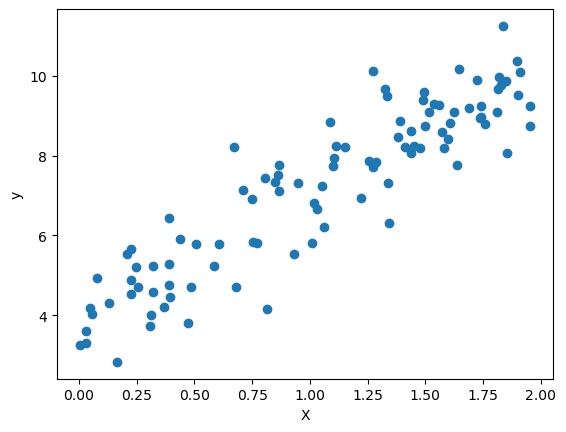

In [5]:
plt.scatter(x=X, y=y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

The actual function that we used to generate the data is y = 4 + 3x1 + Gaussian noise.
Let’s see what the equation found

In [6]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [7]:
theta_best

array([[3.87516468],
       [3.16919967]])

Now you can make predictions using θ:

using formula predicting y (label)

In [8]:
X_new = np.array([[0], [2]])

In [9]:
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance

In [10]:
y_predict = X_new_b.dot(theta_best)


In [11]:
y_predict

array([[ 3.87516468],
       [10.21356402]])

In [12]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.87516468],
       [10.21356402]])

Let’s plot this model’s predictions (Figure 4-2):


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


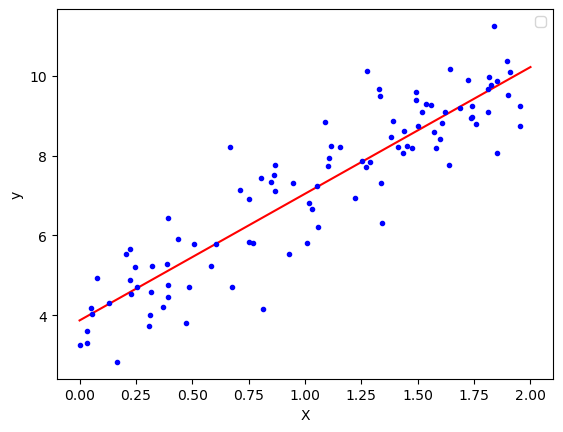

In [13]:
plt.plot(X_new, y_predict, "r-")#this is line pridicted(r-)
plt.plot(X, y, "b.")#these are dots (b.)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Performing linear regression using Scikit-Learn is quite simple:3

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([3.87516468]), array([[3.16919967]]))

In [15]:
lin_reg.predict(X_new)


array([[ 3.87516468],
       [10.21356402]])

The LinearRegression class is based on the scipy.linalg.lstsq() function (the
name stands for “least squares”), which you could call directly:

In [16]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.87516468],
       [3.16919967]])

This function computes θ = X+y, where ᅚ
+
 is the pseudoinverse of X (specifically the
Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoin‐
verse directly:

In [17]:
np.linalg.pinv(X_b).dot(y)


array([[3.87516468],
       [3.16919967]])

The pseudoinverse itself is computed using a standard matrix factorization technique 
called Singular Value Decomposition (SVD) that can decompose the training set
matrix X into the matrix multiplication of three matrices U Σ VT
(see
numpy.linalg.svd()). The pseudoinverse is computed as X
+
= VΣ+U
T
. To compute
the matrix Σ
+
, the algorithm takes Σ and sets to zero all values smaller than a tiny
threshold value, then it replaces all the non-zero values with their inverse, and finally
it transposes the resulting matrix. This approach is more efficient than computing the
Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may
not work if the matrix XTX is not invertible (i.e., singular), such as if m < n or if some
features are redundant, but the pseudoinverse is always defined.

# Computational Complexity

Both the Normal Equation and the SVD approach get very slow
when the number of features grows large (e.g., 100,000). On the
positive side, both are linear with regards to the number of instan‐
ces in the training set (they are O(m)), so they handle large training
sets efficiently, provided they can fit in memory.


# Gradient Descent

Gradient Descent is a very generic optimization algorithm capable of finding optimal
solutions to a wide range of problems. The general idea of Gradient Descent is to
tweak parameters iteratively in order to minimize a cost function.

Concretely, you start by filling θ with random values (this is called random initializa‐
tion), and then you improve it gradually, taking one baby step at a time, each step
attempting to decrease the cost function (e.g., the MSE), until the algorithm converges
to a minimum (see Figure 4-3).

An important parameter in Gradient Descent is the size of the steps, determined by 
the learning rate hyperparameter. If the learning rate is too small, then the algorithm
will have to go through many iterations to converge, which will take a long time (see
Figure 4-4).

On the other hand, if the learning rate is too high, you might jump across the valley
and end up on the other side, possibly even higher up than you were before. This
might make the algorithm diverge, with larger and larger values, failing to find a good
solution (see Figure 4-5).

Finally, not all cost functions look like nice regular bowls. There may be holes, ridges,
plateaus, and all sorts of irregular terrains, making convergence to the minimum very
difficult. Figure 4-6 shows the two main challenges with Gradient Descent: if the ran‐
dom initialization starts the algorithm on the left, then it will converge to a local mini‐
mum, which is not as good as the global minimum. If it starts on the right, then it will
take a very long time to cross the plateau, and if you stop too early you will never
reach the global minimum.

Fortunately, the MSE cost function for a Linear Regression model happens to be a
convex function, which means that if you pick any two points on the curve, the line
segment joining them never crosses the curve. This implies that there are no local
minima, just one global minimum. It is also a continuous function with a slope that
never changes abruptly.4
 These two facts have a great consequence: Gradient Descent
is guaranteed to approach arbitrarily close the global minimum (if you wait long
enough and if the learning rate is not too high).


When using Gradient Descent, you should ensure that all features
have a similar scale (e.g., using Scikit-Learn’s StandardScaler
class), or else it will take much longer to converge.

# Batch Gradient Descent

θ next step = θ − η∇θ MSE(θ)

In [18]:
eta = 0.02 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
 gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
 theta = theta - eta * gradients


In [19]:
theta

array([[3.87554047],
       [3.16889589]])

# Stochastic Gradient Descent


The main problem with Batch Gradient Descent is the fact that it uses the whole
training set to compute the gradients at every step, which makes it very slow when
the training set is large. At the opposite extreme, Stochastic Gradient Descent just
picks a random instance in the training set at every step and computes the gradients
based only on that single instance.

The whole problem with batch gradient descent is that it uses the whole training set at each step to calculate the gradients & optimize the parameters, which makes it very slow if the training set is large.

At the opposite extreme, Stochastic Gradient Descent picks only 1 point and calculate the gradients and update the parameters based on it. Working on 1 data point at a step makes the algorithm really fast. It also makes it possible to train on very large data sets since at each step only one data point is needed in memory. On the other hand, because it only relies on 1 data point at a time (picked randomly) the algorithm is not stable and the loss function doesn't decrease gradually, it only decreases in average.

Over time, SGD will find the parameters such as 
 is very close to 0 but it will continue to bounce up and down due to it picking 1 point at a time.


When the loss curve is irregular, SGD might actually manage to jump out of a local minimum. So SGD has a better chance to find the global minimum than BSG has because SGD is not as stable in optimizing the parameters of the model. Randomness is Good to Espace local minimas but bad because you will never settle on a minima.

This can be addressed by Gradually decreasing the learning rate as the algorithm trains. The steps starts out large which helps the algorithm escape local minima. Then the learning rate gets smaller & smaller, allowing the algorithm to settle on the global minima. This proceess is akin to simulated annealing

The function that determines the learning rate at each iteration is called the learning rate scheduler. If the learning rate get reduced too quickly, we may get stuck at a local minimum, and if the learning rate get reduced very slowly it might not have any effect on stabalizing the algorithm over the global minimum and ie algorithm will continue to bounce back and fourth.

Before diving into the implementation, let's present the formulation of the new loss function & its gradient for Stochastic Gradient Descent. With SGD, we randomly select 1 point from 
 at each step and feed it to the model, meaning:

This code implements stochastic gradient descent using a simple learning schedule:

This code implements Stochastic Gradient Descent using a simple learning schedule:


In [20]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
 return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
 for i in range(m):
  random_index = np.random.randint(m)
  xi = X_b[random_index:random_index+1]
  yi = y[random_index:random_index+1]
  gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
  eta = learning_schedule(epoch * m + i)
  theta = theta - eta * gradients


In [21]:
theta

array([[3.85823881],
       [3.14756409]])

We can also do it the scikit-learn way:

To perform Linear Regression using SGD with Scikit-Learn, you can use the SGDRe gressor class, which defaults to optimizing the squared error cost function. The fol‐ lowing code runs for maximum 1000 epochs (max_iter=1000) or until the loss drops by less than 1e-3 during one epoch (tol=1e-3), starting with a learning rate of 0.1 (eta0=0.1), using the default learning schedule (different from the preceding one), and it does not use any regularization (penalty=None; more details on this shortly):

In [22]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())


SGDRegressor(eta0=0.1, penalty=None)

In [23]:
sgd_reg.intercept_, sgd_reg.coef_


(array([3.91429101]), array([3.20456099]))

# Mini-batch Gradient Descent

Mini-Batch Gradient Descent
At each step, instead of computing the gradients on a single randomly picked instance (SGD) or the full training set (BGD), Mini-Batch gradient descent computes its gradients on randomly selected set of instances. the samples are called Mini-Batches

The main advantage of MBGD over SGD is the performance boost in matrix operations that you get especially from GPUs. Intuitively, MBGD's parameter optimization process is less erratic than SGD because the fed sample is more representative than one randomly selected point, especially for fairly big mini-batch sizes.


The previous figure shows the path taken by BGD, SGD, MBGD. They all endup near the minimum. Batch Gradient Descent actually stops at the minimum while both SGD & MBGD continue to walk around.

We shouldn't forget that batch gradient descent takes a long time to converge because we're computing the gradients over the whole training set at each step.

SGD & MBGD will also converge to the minimum if we use a good learning rate schedule

# Polynomial Regression

What if your data is actually more complex than a simple straight line? Surprisingly,
you can actually use a linear model to fit nonlinear data. A simple way to do this is to
add powers of each feature as new features, then train a linear model on this extended
set of features. This technique is called Polynomial Regression

In [24]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [25]:
print(X)

[[-0.29851681]
 [-1.47787486]
 [ 1.53922156]
 [ 0.19269446]
 [ 0.75924974]
 [-2.06469882]
 [ 2.55473709]
 [ 2.81379333]
 [ 1.77715995]
 [-2.91457217]
 [ 1.20179824]
 [-1.49270197]
 [ 1.92997924]
 [ 0.5294159 ]
 [ 2.96247523]
 [ 0.30568343]
 [ 2.41890298]
 [ 1.14343574]
 [ 2.90700493]
 [-2.68286847]
 [-0.48269856]
 [-2.69533895]
 [ 2.64157576]
 [-0.90868793]
 [ 0.9417852 ]
 [ 0.41444359]
 [ 0.87741184]
 [ 1.78643319]
 [ 2.15150946]
 [ 0.97765393]
 [-0.91381618]
 [ 1.31418423]
 [-0.77491   ]
 [-2.68940188]
 [-0.84441515]
 [ 2.80855497]
 [ 0.68040374]
 [ 0.93297463]
 [ 2.17444455]
 [-0.63450893]
 [-2.98455391]
 [-0.78583656]
 [-2.07673374]
 [ 1.98793888]
 [-0.02999166]
 [-2.47049989]
 [ 0.53018479]
 [ 1.77465176]
 [-1.99041592]
 [ 1.07182337]
 [ 0.66984203]
 [-1.01331076]
 [-1.87397964]
 [ 2.12960468]
 [ 0.10603755]
 [-2.96295886]
 [ 1.16284746]
 [ 1.22022645]
 [ 2.40125935]
 [ 2.15010532]
 [ 1.51659493]
 [-2.77003214]
 [ 0.29340342]
 [ 2.66825035]
 [-1.65029078]
 [ 0.41070198]
 [-1.22308

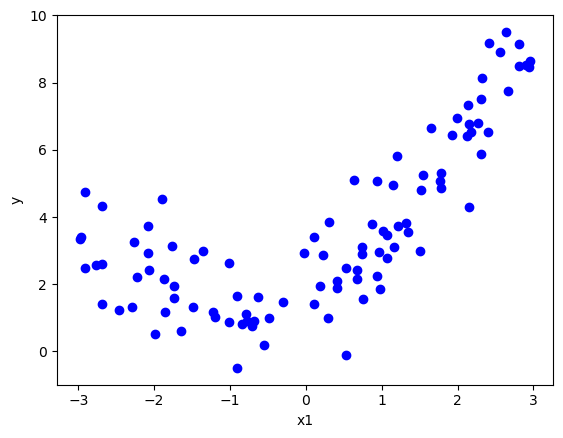

In [26]:
plt.scatter(X, y, color='blue')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s Poly
nomialFeatures class to transform our training data, adding the square (2nd-degree
polynomial) of each feature in the training set as new features (in this case there is
just one feature):

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)# this will change x into (x, x**2)
X[0]




array([-0.29851681])

In [28]:

X_poly[0]


array([-0.29851681,  0.08911228])

X_poly now contains the original feature of X plus the square of this feature. Now you
can fit a LinearRegression model to this extended training data (Figure 4-13):


In [29]:

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_


(array([1.8576012]), array([[1.00380522, 0.52964929]]))

In [30]:
X_b = np.c_[np.ones((100, 1)), X_poly] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [31]:
X_b

array([[ 1.00000000e+00, -2.98516806e-01,  8.91122834e-02],
       [ 1.00000000e+00, -1.47787486e+00,  2.18411409e+00],
       [ 1.00000000e+00,  1.53922156e+00,  2.36920300e+00],
       [ 1.00000000e+00,  1.92694462e-01,  3.71311558e-02],
       [ 1.00000000e+00,  7.59249745e-01,  5.76460175e-01],
       [ 1.00000000e+00, -2.06469882e+00,  4.26298122e+00],
       [ 1.00000000e+00,  2.55473709e+00,  6.52668162e+00],
       [ 1.00000000e+00,  2.81379333e+00,  7.91743291e+00],
       [ 1.00000000e+00,  1.77715995e+00,  3.15829747e+00],
       [ 1.00000000e+00, -2.91457217e+00,  8.49473094e+00],
       [ 1.00000000e+00,  1.20179824e+00,  1.44431901e+00],
       [ 1.00000000e+00, -1.49270197e+00,  2.22815916e+00],
       [ 1.00000000e+00,  1.92997924e+00,  3.72481988e+00],
       [ 1.00000000e+00,  5.29415897e-01,  2.80281192e-01],
       [ 1.00000000e+00,  2.96247523e+00,  8.77625947e+00],
       [ 1.00000000e+00,  3.05683425e-01,  9.34423566e-02],
       [ 1.00000000e+00,  2.41890298e+00

Not bad: the model estimates y = 0 . 56x1
2
+ 0 . 93x1
+ 1 . 78 when in fact the original
function was y = 0 . 5x1
2
+ 1 . 0x1
+ 2 . 0 + Gaussian noise.


In [32]:
theta_best

array([[1.8576012 ],
       [1.00380522],
       [0.52964929]])

In [33]:
lin_reg.intercept_, lin_reg.coef_

(array([1.8576012]), array([[1.00380522, 0.52964929]]))

In [34]:
X_p = np.linspace(start=-3, stop=3, num=100).reshape(-1, 1)
X__p = poly_features.transform(X_p)
y_p = lin_reg.predict(X=X__p)
print(X__p)

[[-3.00000000e+00  9.00000000e+00]
 [-2.93939394e+00  8.64003673e+00]
 [-2.87878788e+00  8.28741965e+00]
 [-2.81818182e+00  7.94214876e+00]
 [-2.75757576e+00  7.60422406e+00]
 [-2.69696970e+00  7.27364555e+00]
 [-2.63636364e+00  6.95041322e+00]
 [-2.57575758e+00  6.63452709e+00]
 [-2.51515152e+00  6.32598714e+00]
 [-2.45454545e+00  6.02479339e+00]
 [-2.39393939e+00  5.73094582e+00]
 [-2.33333333e+00  5.44444444e+00]
 [-2.27272727e+00  5.16528926e+00]
 [-2.21212121e+00  4.89348026e+00]
 [-2.15151515e+00  4.62901745e+00]
 [-2.09090909e+00  4.37190083e+00]
 [-2.03030303e+00  4.12213039e+00]
 [-1.96969697e+00  3.87970615e+00]
 [-1.90909091e+00  3.64462810e+00]
 [-1.84848485e+00  3.41689624e+00]
 [-1.78787879e+00  3.19651056e+00]
 [-1.72727273e+00  2.98347107e+00]
 [-1.66666667e+00  2.77777778e+00]
 [-1.60606061e+00  2.57943067e+00]
 [-1.54545455e+00  2.38842975e+00]
 [-1.48484848e+00  2.20477502e+00]
 [-1.42424242e+00  2.02846648e+00]
 [-1.36363636e+00  1.85950413e+00]
 [-1.30303030e+00  1

In [35]:
X[0]

array([-0.29851681])

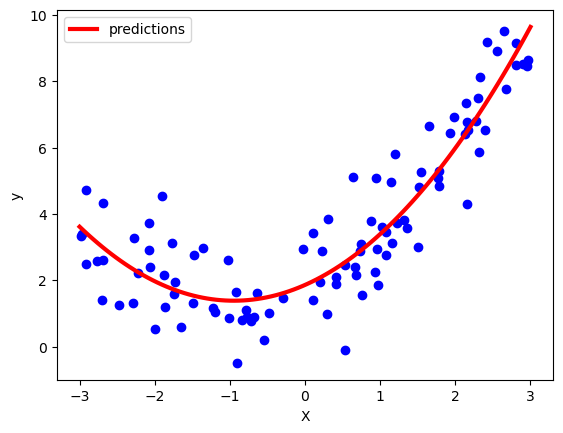

In [36]:
plt.scatter(X, y, color='blue')
plt.plot(X_p, y_p, color='red', label='predictions', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

Not bad: the model estimates y = 0 . 56x1
2+ 0.93x1 + 1 . 78 when in fact the original
function was y = 0.5x1 2 + 1 . 0x1 + 2 . 0 + Gaussian noise.

#  How can you tell that your model is overfitting or underfitting the data?

Degree 1 — Underfitting

Degree 2 — Fitting

Degree 300 — Overfitting

If our model performs good on the training data but badly on the validation data —> Overfitting

If our model performs badly on the training data & badly on the validation data —> Underfitting

If our model performs good on the training data & good on the validation data —> Fitting

In Chapter 2 you used cross-validation to get an estimate of a model’s generalization
performance. If a model performs well on the training data but generalizes poorly
according to the cross-validation metrics, then your model is overfitting. If it per‐
forms poorly on both, then it is underfitting. This is one way to tell when a model is
too simple or too complex.

Another way to tell if we're overfitting/underfitting is to look at the learning curves. We should analyze the curves that show performance over the training set versus validation set with varying training set sizes. To generate the plot, we should train the same model on different training set sizes:

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [38]:
def plot_learning_curve(model, X, y):
    """Plots model training/validation's MSE over different sizes of training sets.
    
    # Arguments
        model: sklearn.*, a scikit-learn model to be trained/tested.
        X: np.ndarray, the input dataset.
        y: np.ndarray, the output dataset.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
    train_errors, val_errors = list(), list()
    for m in range(1, X_train.shape[0]):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_test, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='Training Loss')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='Validation Loss')
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.ylim([0, 3])
    plt.legend(loc='upper right')
    plt.show()

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lin_reg = LinearRegression()

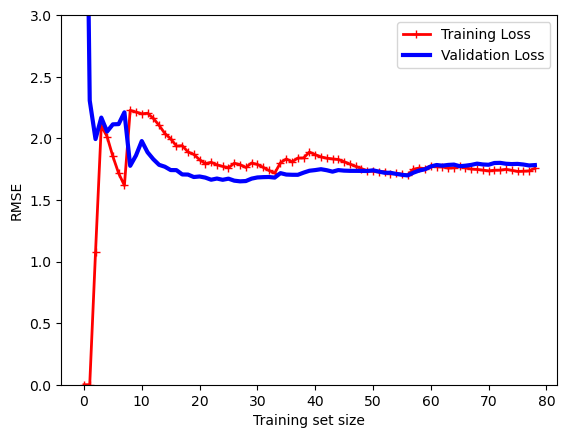

In [41]:
plot_learning_curve(lin_reg, X, y)

When there are 1 or 2 instances in the training set, the model can fit them perfectly. But when we add more training data, it becomes impossible for the model to fit all points perfectly. Both because the data is noisy and because the data isn't linear at all.

The training RMSE converges to a plateau and if we add more data, RMSE doesn't get effected as much. On the other hand, when the model is trained on a few instances, it's not able to generalize well hence the bad losses for val.

As the model is shown more examples, it learns general patterns and the val error converges to the training error.

These curves are typical for a model that is underfitting.

If our model is underfitting the data, adding more data points will not help, we need to add more features or use a more complex model.

Let's fit and visualize the curves of a 10-degree polynomial model:

In [42]:
from sklearn.pipeline import Pipeline

In [43]:
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

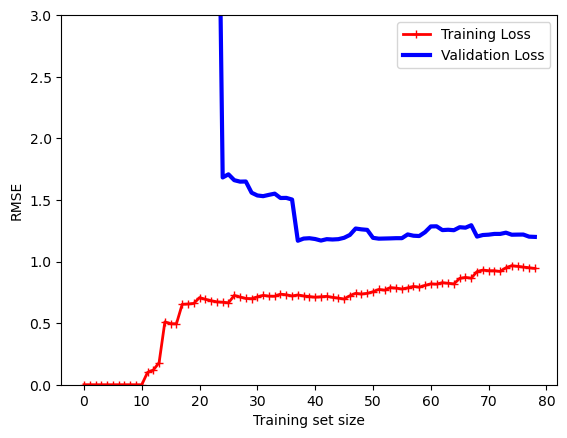

In [44]:
plot_learning_curve(polynomial_regression, X, y)

These learning curves look very similar to the previous ones, but there are some key differences:

The error on the training data is much lower than in the previous example.
there is a gap between the curves, meaning the model performs much better on the training set than on the validation set. Which is the hallmark of an overfitting model.
One solution to overfitting is to have more training data until the validation loss reaches the training loss.

An important theoretical result of statistics and ML is that the generalizability error can be expressed as the sum of three very different erros:

Bias: Has to do with wrong assumptions, like assuming the data is linear when it's actually quadratic. A high bias model is most likely to underfit the training data.

Variance: Has to do with a model's excessive sensitivity to the training data. A high variance model tends to overfit the training data.

Every dataset has what we call irreducible Error (the noisiness of the data itself). The only way to reduce this error is to fix the data. Increasing a model's complexity will typically increase its variance and decrease bias (with a less restricted model). Reducing the model's complexity will increase bias and decrease variance.

This is what we call the bias-variance trade-off.

# Ridge Regression


Ridge Regression (also called Tikhonov regularization) is a regularized version of Lin‐
ear Regression: a regularization term equal to α∑i = 1n θi 2
is added to the cost function. 
This forces the learning algorithm to not only fit the data but also keep the model
weights as small as possible.

In [45]:
from sklearn.linear_model import Ridge

In [46]:
ridge_reg = Ridge(alpha=1, solver="cholesky")


In [47]:
ridge_reg.fit(X, y)


Ridge(alpha=1, solver='cholesky')

In [48]:
ridge_reg.predict([[1.5]])

array([[4.97795845]])

And using Stochastic Gradient Descent

In [49]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])


array([4.94423439])

# Lasso Regression

# ElasticNet

# Early Stopping